In [2]:
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,BatchNormalization
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [12]:
import os
os.getcwd()

'c:\\Users\\ragha\\OneDrive\\Desktop\\CV COURSE\\image classification'

In [13]:
train_dir='flowersDataset/train'
test_dir='flowersDataset/test'

In [14]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'

)

Found 1275 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


In [15]:
model=Sequential()
model.add(Conv2D(96,kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((3,3),strides=(2,2)))

model.add(Conv2D(256,kernel_size=(5,5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((3,3),strides=(2,2)))

model.add(Conv2D(384,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(384,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))

model.add(MaxPool2D((3,3),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(train_generator.num_classes,activation='softmax'))

c:\Users\ragha\anaconda3\envs\pytorch\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 35, 35, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 35, 35, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 17, 17, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 17, 17, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 17, 17, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     9,441,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,979,394 (114.36 MB)

 Trainable params: 29,978,690 (114.36 MB)

 Non-trainable params: 704 (2.75 KB)

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(train_generator,epochs=2,validation_data=test_generator)

Epoch 1/2
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 708ms/step - accuracy: 0.6573 - loss: 0.6617 - val_accuracy: 0.6209 - val_loss: 0.6395
Epoch 2/2
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 597ms/step - accuracy: 0.7263 - loss: 0.5834 - val_accuracy: 0.7473 - val_loss: 0.5792


In [22]:
test_loss,test_acc=model.evaluate(test_generator)
print(f'test accuracy: {test_acc}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.7473 - loss: 0.5792
test accuracy: 0.7472527623176575


## Model saving

In [23]:
model.save('alexnet_custom_dataset_model.h5')

## visualizing loss and accuracy

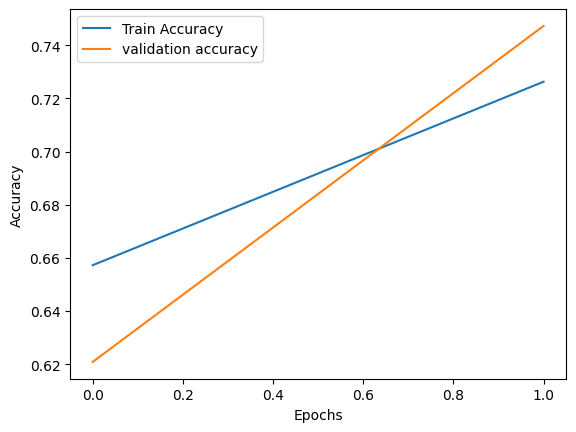

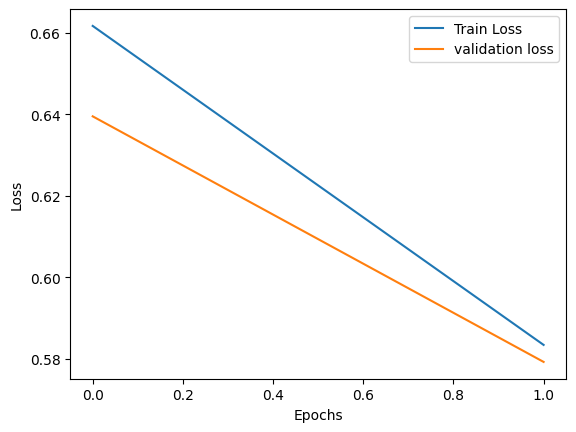

In [24]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [25]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img,img_to_array

def predict_image(model,image_path,class_names):
    img=load_img(image_path,target_size=(150,150))
    img_array=img_to_array(img)/255.0
    img_array=np.expand_dims(img_array,axis=0)

    prediction=model.predict(img_array)
    predicted_class_index=np.argmax(prediction[0])
    predicted_class=class_names[predicted_class_index]
    return predicted_class

class_names=['daisy','dandelion']
image_path='flowersDataset/test/daisy/476857510_d2b30175de_n_jpg.rf.40ff83ae9c6f996b11149eaf1eafcc2e.jpg'
predicted_class=predict_image(model,image_path,class_names)
print(f'predicted class: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
predicted class: dandelion
